## Instructions {-}
Ce sujet est constitué de deux parties : la partie 1 correspond au sujet donné l'an dernier, dont la correction vous est donnée, la partie 2 constitue la partie qui sera évaluée et se place dans la continuité de la partie 1.

# Enoncé du problème (Partie 1)

L'objectif de ce projet est d'estimer la longueur de câble sous-marin nécessaire pour relier deux côtes $A$ et $B$  en utilisant des simulations conditionnelles.


Le câble reposera sur le fond marin dont la profondeur est inconnue.
Le segment $[AB]$ est discrétisé par une séquence de (N+1) points. On pose $x_0=A$ et pour $i=1,\dots,N$, $$x_i=x_0+i\Delta$$ où $$\Delta = \frac{AB}{N}$$ de telle sorte que $x_N=B$.
On note $z(x)$ la profondeur du fond marin au point $x$ de telle sorte 
qu'on pourra estimer la longueur totale de câble nécessaire par la somme 
des longueurs sur les segments de la discrétisation :

$$l=\sum_{i=1}^N\sqrt{\Delta^2+(z(x_i)-z(x_{i-1}))^2}.$$

Enfin, notons que l'on dispose d'un ensemble de $n$ observations de la 
profondeur que l'on supposera situées sur des points de discrétisation $z(x_{j_1}),\dots,z(x_{j_n})$.


On adopte un modèle probabiliste pour la profondeur. On suppose que le vecteur des 
profondeurs sur les points de discrétisation 
$\mathbf{z}=(z(x_0),\dots,z(x_N))$ est la réalisation
d'un vecteur aléatoire gaussien $\mathbf{Z}=(Z(x_0),\dots,Z(x_N))$ 
dont le vecteur d'espérance ne contient qu'une seule valeur $\mu$ 
répétée $N+1$ fois et dont la matrice de covariance $\Sigma$ a pour termes $\sigma_{ij}$
définis par $\sigma_{ij}=C(|x_i-x_j|)$ où $C$ est une
fonction décroissante, traduisant le fait que deux points 
géographiquement proches ont tendance à avoir des profondeurs plus similaires que deux points éloignés.

On supposera que la matrice de covariance ainsi 
générée est définie-positive (en fait, $C$ sera choisie parmi les fonctions qui, 
appliquées aux termes d'une matrice de distance, produisent des matrices définie-positives). 

Si on note $L$ la variable aléatoire donnant la longueur de cable nécessaire : 
$$L=\sum_{i=1}^N\sqrt{\Delta^2+(Z(x_i)-Z(x_{i-1}))^2},$$
un bon estimateur de $L$ est fourni par l'espérance conditionnelle 

$$L^\star=E[L|Z(x_{j_1})=z(x_{j_1}),\dots,Z(x_{j_n})=z(x_{j_n})].$$
                                                                              
Cependant, cette quantité est difficilement accessible par le calcul. 
On va donc avoir recours à des
simulations conditionnelles. C'est-à-dire que l'on va simuler 
un nombre $K$ de réalités (disons des réalisations du modèle 
probabiliste choisi), et sur chacune d'entre elle, 
la quantité de câble nécessaire sera évaluée. 
On disposera ainsi d'un échantillon $l_{(1)},\dots,l_{(K)}$ de 
longueures simulées. Puis on approchera l'espérance conditionnelle  par 
$$L^\star=\frac1{K}\sum_{k=1}^K l_{(k)}.$$

L'objectif de ce projet est donc d'écrire un code permettant 
d'effectuer cette simulation conditionnelle, puis de l'appliquer 
au jeu de données fourni et d'en déduire une estimation de la longueur de câble nécessaire.

## Questions théoriques

1. Quel théorème du cours nous autorise-t-il à estimer l'espérance conditionnelle par la moyenne empirique de simulations conditionnelles ?

*la loi forte des grands nombres, cf [Proba IV p.16](https://boisgera.github.io/CDIS/output/Probabilit%C3%A9%20IV.pdf), en vérifiant que $L$ est bien intégrable*

2. Rappeler la loi conditionnelle du vecteur des composantes de $\mathbf{Z}$ correspondant aux points de discrétisation
sans observation, connaissant les valeurs prises par les composantes aux sites d'observation.

*cf. [Proba III p.18](https://boisgera.github.io/CDIS/output/Probabilit%C3%A9%20III.pdf),*

3. Si $\mathbf{Y}=(Y_1,\dots,Y_p)$ est un vecteur de composantes gaussiennes indépendantes, toutes d'espérance nulle et de variance 1, 
quelle est la loi du vecteur $\mathbf{Z}=m+R\mathbf{Y}$ où $R$ est une matrice $p\times p$ et $m$ est un vecteur de taille $p$ ?

*cf. [Proba V p.12](https://cloud.mines-paristech.fr/index.php/s/GLDwtTAMOJCYk3i/download)*

4. En déduire un algorithme de simulation conditionnelle.

*Appliquer l'algorithme de la q.3 à la loi conditionnelle (on calculera en particulier l'espérance conditionnelle de $\mathbf{Z}$ sachant les données et la décomposition de Cholesky de la matrice de covariance conditionnelle sachant les données).*

## Données du problème
Conventionnellement, $A$ est l'origine, $B=500$, $N=100$.

Les données $$\begin{array}{c|r}i & z(x_i)\\
\hline
0 & 0\\
20 & -4\\
40 & -12.8\\
60 & -1\\
80 & -6.5\\
100 & 0\end{array}$$

L'espérance de chaque composante du vecteur aléatoire $\mathbf{Z}$ est donnée par $\mu=-5.$

La fonction $C$ est définie par $$C(h)=\sigma^2 e^{-|h|/a},$$

où $|h|$ correspond à la distance entre deux points, $a=50$ et $\sigma^2=12$.


## Implémentation

### Préambule

In [1]:
#Chargement de dépendances

import numpy as np
import matplotlib.pyplot as plt

#Discrétisation
A=0
B=500
N=101 #Nombre de points de discrétisation
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N)
discretization = discretization_indexes*Delta
#Paramètres du modèle

mu=-5
a = 50
sigma2 = 12

#Données

observation_indexes = [0,20,40,60,80,100]
depth = np.array([0,-4,-12.8,-1,-6.5,0])

#Indices des composantes correspondant aux observations et aux componsantes non observées

unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))


### Questions

1. Ecrire une fonction qui prend en argument la distance entre les points, le paramètre $a$, et le paramètre $\sigma^2$, et qui retourne la covariance entre deux points.
On pourra fournir une matrice de distance à cette fonction. Dans ce cas, la fonction renverra la matrice de covariance.

In [8]:
#dist : distance entre les points (ou matrice de distance)
#rangeval : a
#sigmaval : sigma^2
def Covexp(dist,rangeval,sigmaval):
    return sigmaval * np.exp(-dist/rangeval)


2. Calculer la matrice de distance.

In [9]:
#np.subtract.outer permet d'effectuer le calcul sur toutes les paires
distmat=abs(np.subtract.outer(discretization,discretization))

3. Calculer la matrice de covariance du vecteur $\mathbf{Z}=(Z(x_0),\dots,Z(x_N))$.

In [10]:
#Par définition, la mat de cov de Z est la matrice définie par les sigma_i_j, ie Covexp appliquée à distmat.
Sigma=Covexp(distmat,a,sigma2)

4. Extraire les 3 matrices de covariance suivantes :

 * entre les observations

 * entre les observations et les inconnues

 * entre les inconnues


In [11]:
# Tout est dans la matrice calculée précédemment.
SigmaObs = Sigma[observation_indexes,:][:,observation_indexes]
SigmaObsUnknown = Sigma[observation_indexes,:][:,unknown_indexes]
SigmaUnknown = Sigma[unknown_indexes,:][:,unknown_indexes]

5. Calculer l'espérance conditionnelle des composantes non observées connaissant les observations et la représenter avec les données.

In [39]:
# cf. question théorique 2 : les lois conditionnelles dans les vecteurs gaussiens
invSigma = np.linalg.inv(SigmaObs) 
Ec= mu+np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),depth-mu))

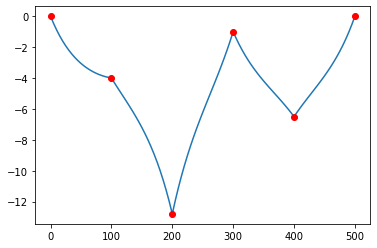

In [16]:
allval1 = np.zeros(N)
allval1[unknown_indexes]=Ec
allval1[observation_indexes]=depth
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth, 'ro')
plt.show()

6. Calculer la matrice de variance conditionnelle et tracer sa diagonale (variance conditionnelle) en fonction de la position. Commenter.

In [17]:
SigmaCond = SigmaUnknown - np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),SigmaObsUnknown))

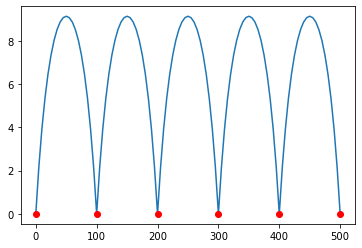

In [18]:
allval2 = np.zeros(N)
allval2[unknown_indexes]=np.diag(SigmaCond)
plt.plot(discretization,allval2)
plt.plot(discretization[observation_indexes], np.zeros(np.shape(observation_indexes)[0]), 'ro')
plt.show()

*On voit ici que la variance est nulle aux points de données (puisque la valeur est fixée) puis qu'elle augmente lorsqu'on s'éloigne des données*

7. Effectuer une simulation conditionnelle. Sur un même graphique, tracer la simulation ainsi que les données et l'espérance conditionnelle. Commenter.

In [25]:
# cf. q théorique 2
Cholesky = np.linalg.cholesky(SigmaCond)
x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
simu = Ec + np.matmul(Cholesky,x)

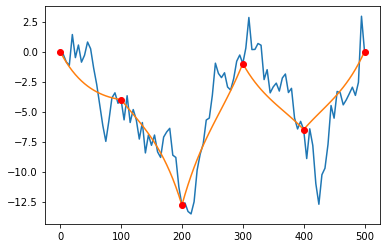

In [26]:
allval3 = np.zeros(N)
allval3[unknown_indexes]=simu
allval3[observation_indexes]=depth
plt.plot(discretization,allval3)
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth, 'ro')
plt.show()

*l'espérance conditionnelle est lisse car c'est la fonction des données qui minimise la variance ; la simulation conditionnelle reproduit les fluctuations du modèle et donc l'aspect du fond marin*

8. Ecrire une fonction qui calcule la longueur du câble en fonction du vecteur des profondeurs et du pas de discrétisation.

In [27]:
def length(z,delta):
    return sum(np.sqrt(Delta**2+(z[1:N]-z[0:-1])**2))

9. Utiliser cette fonction pour calculer la longueur du câble à partir de 100 simulations. Comparer l'espérance conditionnelle (estimée) de la longueur avec la longueur de l'espérance conditionnelle.

In [29]:
K=100
result = np.zeros(K)
for i in range(K):
    x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
    allval3[unknown_indexes]=Ec + np.matmul(Cholesky,x)
    result[i]=length(allval3,Delta)


In [30]:
sum(result)/K

522.4621183496789

In [31]:
length(allval1,Delta)

501.6468416918411

*On donne ici directement les résultats pour 100000 simulations (comparer la vitesse d'éxécution avec votre code pour voir l'intérêt de la vectorisation).*

*On voit ici que la longueur donnée par l'espérance conditionnelle est bien moindre que la longueur d'une simulation conditionnelle. Ceci est dû au fait que la simulation conditionnelle va reproduire les fluctuations attendues, au contraire de l'espérance conditionnelle qui minimise la variance.*

*NB : On remarquera que c'est le seul endroit où on a utilisé une boucle dans cette correction. On aurait pu s'en passer en utilisant notamment les outils de la librairie Pandas mais le code est plus lisible ainsi.*

10. Représenter la suite $M_n$ des moyennes des longueurs de câbles en fonction du nombre de simulations. Commenter.

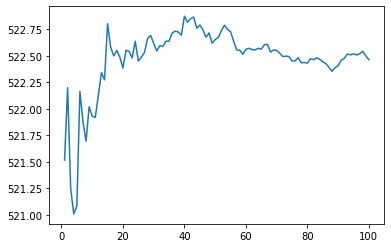

In [34]:
indice_simu = 1+np.arange(K)
plt.plot(indice_simu,np.cumsum(result)/indice_simu)
plt.show()

*Comme attendu d'après la LFGN, on observe une stabilisation de la valeur moyenne. Les variations sont imperceptibles après quelques dizaines de milliers de simulations*

11. Représenter l'histogramme des longueurs de câbles générées.

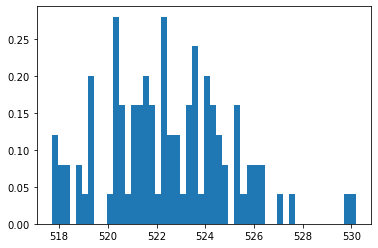

In [35]:
plt.hist(result,50,density=True)
plt.show()

*L'histogramme ressemble à une densité gaussienne, avec néanmoins une légère dissymétrie (plus de valeurs fortes).*

12. Donner un intervalle de confiance à 95% de la longueur du câble par 2 méthodes différentes. Commenter.

*1ère méthode : par approximation gaussienne. L'histogramme précédent suggère qu'une loi gaussienne peut bien représenter la loi conditionnelle de la longueur du cable. On obtient un intervalle de confiance en calculant la moyenne (milieu de l'intervalle) et l'écart type de l'échantillon de longueurs de câble puis en appliquant la formule du cours.*

In [36]:
Ln = sum(result)/K
sigman = np.std(result)
[Ln - sigman*1.96,Ln + sigman*1.96]

[517.4691479802692, 527.4550887190886]

*2e méthode : on extrait les quantiles à 2.5% et 97.5% de l'échantillon, c'est-à-dire les valeurs $x_\alpha$ pour $\alpha \in \{0.025 ; 0.975\}$telles que* $$\mathbb{P}(L<x_\alpha) \approx \frac{1}{n}\sum_{i=1}^N 1_{\{L_i<x_\alpha\}}$$

In [37]:
np.quantile(result,[0.025,0.975])

array([517.93756154, 527.33943342])

*ATTENTION : ici l'utilisation du TCL tel qu'exposé au début du chapitre 5 fournissait un intervalle de confiance de l'**espérance de la longueur de câble** et non de la **longueur de câble** (erreur fréquente).*

*On voit par ailleurs que la 2e méthode est plus précise car elle est basée directement sur la loi empirique de l'échantillon*

13. Donner une estimation de la probabilité que la longueur du câble dépasse 525 m.

In [38]:
np.mean(result>525)

0.15

14. Reprendre les questions précédentes avec 1000, 10000 puis 100000 simulations. Commenter

*cf. le commentaire de la question 10. On observe une stabilisation progressive des estimateurs des différentes quantités calculées : moyennes, quantiles, probabilité de dépassement de seuil.*

# Enoncé 2021 (Partie 2)

Nous nous plaçons dans le même cadre que ci-dessus. Nous tenons pour acquis les résultats précédents et allons maintenant approfondir l'analyse.

## Valeurs positives

1. A la question 7 de la partie 1, on peut s'apercevoir que certains profils de profondeur présentent des valeurs positives, ce qui n'a pas de sens si on considère qu'il n'y a pas de partie émergée entre les deux côtes. Proposer et implémenter un algorithme de type rejet qui ne génèrera que des valeurs négatives. Représenter un profil de profondeur généré.

#### Réponse (question 1)

Pour cela, on reprend exactement le code de la question 7, mais on introduit une vérification de la profondeur (méthode du rejet).
* Si une profondeur est positive, on recommence le calcul
* Si toutes les profondeurs sont négatives, on retourne le vecteur aléatoire construit.

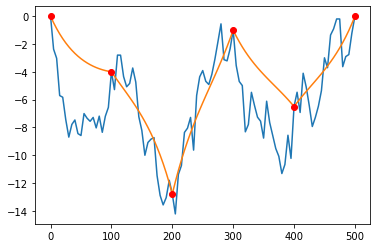

In [113]:
# On reprend le code de la q7, et on adapte.

Cholesky = np.linalg.cholesky(SigmaCond)

def genererNegatives():
    # On utilise la méthode de Cholesky
    # pour fabriquer un vecteur aléatoire de moyenne Ec et de matrice de covariance SigmaCond
    ok = False
    rejet = 0

    while not(ok):
        # On souhaite fabriquer un vecteur aléatoire gaussien de taille unknown-indexes (inconnues),
        # d'espérance Ec (espérance conditionnelle des composantes non-observées, connaissant les observations d'après Proba 3 p. 19)
        # et de matrice de covariance SigmaCond (matrice de covariance conditionnelle d'après Proba 3, p.19)
        # Ces deux quantités ont déjà été fabriquées. Il ne reste plus qu'à fabriquer le vecteur aléatoire.
    
        x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
        simu = Ec + np.matmul(Cholesky,x)
    
        # On utilise une méthode de rejet pour interdire les valeurs positives.
        ok = np.all(simu <= 0)
        
        if(not(ok)):
            rejet+=1
    
    return(simu, rejet)
    
simu = genererNegatives()[0]

#Affichage
allval3 = np.zeros(N)
allval3[unknown_indexes]=simu
allval3[observation_indexes]=depth
plt.plot(discretization,allval3)
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth, 'ro')
plt.show()

2. L'emploi de cet algorithme a-t-il un impact sur la valeur moyenne de la longueur de câble ? Sur l'histogramme des longueurs de câble ? Sur l'intervalle de confiance obtenu par la méthode des quantiles ? Sur la probabilité de dépassement du seuil de 525 m? Donner une estimation du taux de rejet de l'algorithme. Considérer 10000 simulations.

#### Réponse (question 2)

On simule 10 000 fois pour chacun des cas (valeurs négatives uniquement, ou quelconques), et on calcule les valeurs souhaitées.

In [96]:
# Fonction auxiliaire
def genererQuelconque():
    x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
    return Ec + np.matmul(Cholesky,x)

In [121]:
#Initialisation
K=10000
simu_neg = np.zeros(N)
simu_qqc = np.zeros(N)
simu_neg[observation_indexes] = depth
simu_qqc[observation_indexes] = depth


longueur_neg = np.zeros(K)
longueur_qqc = np.zeros(K)

rejets = np.zeros(K)

for i in range(K):
    simu_neg[unknown_indexes], rejets0 = genererNegatives()
    simu_qqc[unknown_indexes] = genererQuelconque()
    
    # Longueur du câble
    longueur_neg[i]=length(simu_neg,Delta)
    longueur_qqc[i]=length(simu_qqc,Delta)
    
    #Essais
    rejets[i] = rejets0

In [122]:
print("==Longueur du câble==")
print(" - cas négatif : ", np.sum(longueur_neg)/K)
print(" - cas quelconque : ", np.sum(longueur_qqc)/K)

==Longueur du câble==
 - cas négatif :  521.8093337508743
 - cas quelconque :  522.4312735266979


==Histogramme==


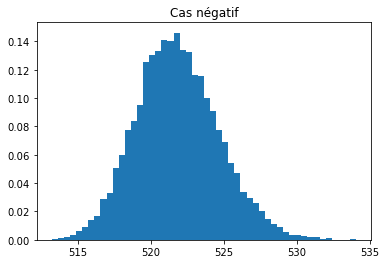

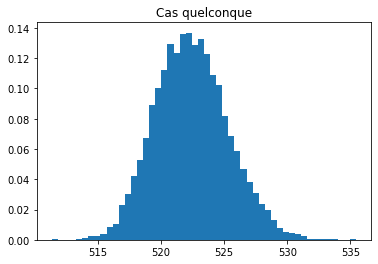

In [123]:
print("==Histogramme==")
plt.hist(longueur_neg,50,density=True)
plt.title("Cas négatif")
plt.show()
plt.hist(longueur_qqc,50,density=True)
plt.title("Cas quelconque")
plt.show()

In [124]:
print("==Intervalle de confiance==")
print(" - cas négatif : ", np.quantile(longueur_neg, [0.025,0.975]))
print(" - cas quelconque : ", np.quantile(longueur_qqc, [0.025,0.975]))

==Intervalle de confiance==
 - cas négatif :  [516.65767846 527.71810074]
 - cas quelconque :  [517.13050533 528.39420673]


In [125]:
print("==Probabilité de dépassement==")
print(" - cas négatif : ", np.mean(longueur_neg>525))
print(" - cas quelconque : ", np.mean(longueur_qqc>525))

==Probabilité de dépassement==
 - cas négatif :  0.1325
 - cas quelconque :  0.1836


In [126]:
print("==Taux de rejet==")
print("Il y a eu : ")
rejets_tot = np.sum(rejets)
print(int(rejets_tot) + K,"simulations au total, dont")
print("-", int(rejets_tot),"rejets")
print("-", K,"réussites")
print(" => cela fournit donc un taux de rejet de ", (rejets_tot)/(rejets_tot + K)*100,"%")

==Taux de rejet==
Il y a eu : 
263186 simulations au total, dont
- 253186 rejets
- 10000 réussites
 => cela fournit donc un taux de rejet de  96.20040579666092 %


Pour la **longueur du câble**, on constate que la valeur est légérement plus élevée pour le cas où l'on admet des valeurs quelconques. Cela est cohérent, car en forçant les valeurs à rester négatives, le câble a intuitivement tendance à parcourir une distance plus faible (on restreint les valeurs atteignables).

Pour **l'histogramme de la longueur du câble**, on remarque qu'il est légéremment déplacé vers la droite dans le cas quelconque (conformément à l'intuition). Autrement, la distribution reste semblable.

Pour **l'intervalle de confiance**, on constate également qu'il est légérement déplacé vers la droite dans le cas quelconque (conformément à l'intuition).

Pour **la probabilité de dépassement de 525m**, on remarque qu'elle est plus faible pour le cas négatif. C'est conforme à l'intuition là aussi.

Le **taux de rejet** est d'environ 96%. Cette méthode est donc peu efficace pour générer un grand nombre de valeurs.

## Approche Bayésienne

Dans la première partie, on a considéré que l'ensemble des paramètres du modèle était parfaitement connu. Toutes choses égales par ailleurs, on va maintenant considérer que la moyenne $\mu$ est issue d'une estimation entâchée d'une incertitude. Plus précisément, on va modéliser cette incertitude en considérant que $\mu \sim \mathcal{N}(-5,4)$.

On va également décomposer le vecteur $\mathbf{Z}$ en $\mathbf{Z} = (\mathbf{Z}_{\text{OBS}},\mathbf{Z}_{\text{UNK}})$. On notera $C_{\text{OBS}}$ et $C_{\text{UNK}}$ les matrices de covariance respectives de $\mathbf{Z}_{\text{OBS}}$ et $\mathbf{Z}_{\text{UNK}}$ ainsi que $C_{\text{OBS},\text{UNK}}$ la matrice des covariances entre ces deux vecteurs.

### Questions théoriques

3. Montrer que $\mu | \mathbf{Z}_{\text{OBS}}= \mathbf{z}_{\text{OBS}} \sim \mathcal{N}(\widehat{\mu},\widehat{\sigma}^2)$ avec
$$\widehat{\sigma}^2 = (\mathbf{1}^t C_{\text{OBS}}^{-1} \mathbf{1} + \frac1{4})^{-1},$$ 
où $\mathbf{1}$ est un vecteur de longueur 6 (soit la longueur du vecteur $\mathbf{Z}_{\text{OBS}}$) ne contenant que des 1 et 
$$\widehat{\mu} = \widehat{\sigma}^2 (\mathbf{1}^t C_{\text{OBS}}^{-1} \mathbf{z}_{\text{OBS}} - \frac{5}{4} )$$
Indication : écrire la densité jointe du vecteur $(\mathbf{Z}_{\text{OBS}},\mu)$, calculer $-2 \ln$ de cette densité puis identifier la forme quadratique faisant intervenir $\mu$.

#### Réponse (question 3, TODO)

Posons $\mathbf{X} := (\mu, \mathbf{Z}_{obs})$.

Alors la densité jointe s'écrit :
$$
f_X(x) = f_X(y,z_{obs})=\dfrac{1}{(2 \pi ) ^{7/2}} \cdot \dfrac{1}{\sqrt{\det \mathbf{C}}} \cdot \exp\left((x-(-5, y,...,y))^{T}C^{-1}(x-(-5, y,...,y))\right)
$$

où $\mathbf{C}$ est la matrice de covariance de $\mathbf{X}$. Puis :

$$
-2\ln(f_X(x)) = 7\ln(2\pi) + \ln(\det C) + (x-(-5, y,...,y))^{T}C^{-1}(x-(-5, y,...,y))
$$

Or, par l'exemple du cours sur les lois conditionnelles pour un vecteur gaussien,

$$\det C = \det (4 - V^TC_{obs}^{-1}V) \cdot \det (C_{obs})$$

où $V = (\text{Cov}(\mu, Z_{obs,i}))_i$

ce qui permet d'écrire que :

$$\ln(\det C) = \ln(4 - V^TC_{obs}^{-1}V) + \ln( \det (C_{obs}))$$

Enfin, toujours par ce cours, on peut décomposer la forme quadratique, ce qui nous donne :

$$
-2\ln(f_X(x)) = \left(\ln(2\pi) + \ln(4 - V^TC_{obs}^{-1}V) + A(x)\right) + \left(6\ln(2\pi) + \ln( \det (C_{obs})) + B(x)\right)
$$

où :

$$A(x) = \left(y-(-5+V^{T}C_{obs}^{-1}((z_{obs})-(y,...,y))\right)^T \cdot \left(4 - V^TC_{obs}^{-1}V\right)^{-1} \cdot \left(y-(-5+V^{T}C_{obs}^{-1}((z_{obs})-(y,...,y))\right)$$
$$B(x) = \left((z_{obs}) - (y,...,y)\right)^TC_{obs}^{-1}\left((z_{obs}) - (y, ..., y)\right)$$

On reconnaît dans la deuxième partie de l'expression la formule de $-2\ln(f_Z(z_{obs}))$. Or, étant donné que $-2\ln f_X(y, z_{obs})=-2\ln f_Z(z_{obs}) -2\ln f_{\mu | Z = z_{obs}}(y)$, on obtient que :

$$
-2\ln f_{\mu | Z = z_{obs}}(y) = \ln(2\pi) + \ln(4 - V^TC_{obs}^{-1}V) + A(x)
$$






Or, on réecrit $A(x)$ de la forme :

$$
A(x) = (1+V^TC_{obs}^{-1}\mathbf{1})^2 \cdot (y-m)^T \cdot \left(4 - V^TC_{obs}^{-1}V\right)^{-1} \cdot (y-m)
$$

où $m=\dfrac{-5 + V^TC_{obs}z_{obs}}{1+V^TC_{obs}^{-1}\mathbf{1}}$

TODO

4. Montrer que si $X$, $Y$ et $Z$ sont trois vecteurs aléatoires à densité, alors $f_{X,Y|Z = z}(x,y) = f_{X|Y=y,Z=z}(x)f_{Y|Z=Z}(y)$

#### Réponse (question 4)

D'une part, en conditionnant par $Z$ :

$$
f_{X,Y,Z}(x,y,z)=f_{X,Y|Z=z}(x,y)f_{Z}(z)
$$

et d'autre part en conditionnant par $(Y,Z)$:

$$
f_{X,Y,Z}(x,y,z)=f_{X|Y=y,Z=z}(x)f_{Y,Z}(y,z)
$$

d'où :

$$f_{X,Y|Z=z}(x,y)=f_{X|Y=y,Z=z}(x) \cdot \dfrac{f_{Y,Z}(y,z)}{f_{Z}(z)}$$

On reconnaît dans ce dernier terme $f_{Y|Z=z}(y)$, ce qui fournit le résultat voulu.

5. En déduire que la densité de $(\mathbf{Z}_{\text{UNK}},\mu) | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}$ s'écrit comme le produit de $f_{\mu | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}$ et de $f_{\mathbf{Z}_{\text{UNK}}| \mu = \mu^\star, \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}$ que l'on exprimera.

    Indication : $f_{\mathbf{Z}_{\text{UNK}}| \mu = \mu^\star, \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}$ est identique à la densité $f_{\mathbf{Z}_{\text{UNK}}| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}$ utilisée dans la partie 1 avec $\mu = \mu^\star$

#### Réponse (question 5)

Par la question précédente, on a immédiatement :

$$
f_{Z_{UNK},\mu | Z_{obs} = z_{obs}}(z, \mu^\star)=f_{Z_{\textbf{UNK} | \mu = \mu^\star, Z_{obs}} = z_{obs}}(z) \cdot f_{\mu | Z_{obs} = z_{obs}}(\mu^\star)
$$

Puis par la partie 1 (question théorique 2), comme (N-6)/2 = 47

$$
f_{Z_{\textbf{UNK} | \mu = \mu^\star, Z_{obs}} = z_{obs}}(z) = \dfrac{1}{(2\pi)^{47}} * \dfrac{1}{\sqrt{\det(\Sigma)}} \exp\left(-\dfrac{1}{2}(z-E_c)^T\Sigma^{-1}(z-E_c)\right)
$$

où :
* $\Sigma$ est la matrice de covariance conditionnelle (calculée à la partie 1)
* $E_c$ est l'espérance conditionnelle (calculée à la partie 1, en utilisant $\mu = \mu^\star$)

Et par la question 3 :

$$
f_{\mu | Z_{obs} = z_{obs}}(\mu^\star) = \dfrac{1}{\sqrt{2\pi}}\dfrac{1}{\widehat\sigma}\exp\left(-\dfrac{1}{2}\left(\dfrac{\mu^\star - \widehat\mu}{\widehat\sigma}\right)^2\right)
$$

### Simulation

On va maintenant chercher à simuler les valeurs de $\mathbf{Z}_{\text{UNK}}$ en tenant compte de l'incertitude sur $\mu$.

En première approche, on pourrait chercher à obtenir la densité de $\mathbf{Z}_{\text{UNK}} | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}$ en calculant 
$$\int_\mathbb{R} f_{(\mathbf{Z}_{\text{UNK}},\mu) | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}(\mathbf{z}_{\text{UNK}},\mu^\star) d\mu^\star$$
mais ce calcul a peu de chances d'aboutir.

On va plutôt procéder par simulations en cascade, c'est-à-dire que pour chaque simulation de $\mathbf{Z}_{\text{UNK}}$, on va d'abord générer une valeur $\mu^\star$ de $\mu$ selon $f_{\mu | \mathbf{Z}_{\text{OBS}}= \mathbf{z}_{\text{OBS}}}$ puis on simulera $\mathbf{Z}_{\text{UNK}}$ selon $f_{\mathbf{Z}_{\text{UNK}}| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}},\mu = \mu^\star}$.


6. Calculer $\widehat{\mu}$ et $\widehat{\sigma}^2$. 

7. Calculer la probabilité de $\{\mu| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}} > 0\}$. Proposer et implémenter un algorithme de simulation de $\mu| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}, \mu <0$.

8. Générer un couple $\mathbf{Z}_{\text{UNK}}, \mu| \mathbf{Z}_{\text{OBS}}, \mu <0$ et représenter le profil de profondeur obtenu. On prendra soin de ne générer que des valeurs négatives de $\mathbf{Z}_{\text{UNK}}$ en utilisant l'algorithme de la section précédente.

9. Générer 10000 profils de profondeur et calculer les longueurs de câble associées. Comparer la valeur moyenne de la longueur de câble, dont on visualisera la convergence, l'histogramme des longueurs de câble, l'intervalle de confiance obtenu par la méthode des quantiles, la probabilité de dépassement du seuil de 525 m avec les résultats obtenus précédemment. Commenter.

10. Qu'adviendrait-il selon vous si on rendait également aléatoires les autres paramètres du modèle $\sigma^2$ et $a$ ?

11. (facultatif) On suppose désormais que $\alpha = \frac1{\sigma^2} \sim \Gamma(a_1,a_2)$, où $\sigma^2$ correspond au paramètre qui intervient dans la fonction $C$. Donner l'expression de la densité de $\alpha | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}$,  de $\mu | \alpha, \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}},$ et de $\mathbf{Z}_{\text{UNK}} | \mu, \alpha, \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}$. Proposer un algorithme de simulation tenant compte de l'incertitude sur le paramètre $\alpha$ et analyser son impact sur les différentes quantités évaluées.

    Indication : Pour identifier la densité de $\alpha | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}$, exprimer d'abord la densité jointe de $(\alpha,\mu, \mathbf{Z}_{\text{OBS}})$ puis marginaliser pour obtenir la densité de $(\alpha,\mathbf{Z}_{\text{OBS}})$
